In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

[Лекция](../lectures/lecture_5/lecture_5.ipynb)

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать как минимум количественные признаки. Если категориальных нет, то пропустить пункты с временным убиранием категориальных признаков. Желательно наличие обоих типов признаков в датасете.
2. Датасет и подготовка данных, этап 1:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Визуализировать `heatmap`-матрицу кореллированности признаков.
   - Визуализировать взаимосвязь между `target`-переменной и каждым из признаком (с использованием `srs.pairplot` или `pandas.plotting.scatter_matrix`). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с `sns.FacetGrid` в лекции).
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо временно убрать категориальные признаки (исходные датафреймы сохранить для 2 этапа).
3. Регрессия МНК:
   - Обучить модель линейной регрессии `LinearRegression`.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Вывести `model.coef_` и `model.intercept_`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
4. Для каждого вида регрессии (`Ridge`, `LASSO`, `Elastic Net`):
   - С использованием `GridSearchCV` осуществить подбор параметров регуляризации (`alpha` для `Ridge` и `LASSO`, `alpha` и `l1_ratio` для `Elastic Net`)
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе для наилучшей модели ($MSE$, $MAE$ и $R^2$).
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).  
   
   > Запомнить лучшие модели для 2 этапа.
5. Датасет и подготовка данных, этап 2:
   - Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.
   - Закодировать категориальные признаки в обучающей и тестовой выборках.
6. Регрессии, этап 2:
   - Обучить `LinearRegression`, лучшие модели `Ridge`, `LASSO`, `Elastic Net` на обучающем наборе с категориальными признаками.
   - Вывести значения гиперпараметров, коэффициенты регрессии (`model.coef_` и `model.intercept_`) и значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
   - Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.
   - Выбрать лучшую модель.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Осуществить фильтрацию признаков с использованием `Recursive Feature Elimination`.
   - Построить график (`barh`) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).
   - Вывести значения метрик на тестовом наборе ($MSE$, $MAE$ и $R^2$).
7. Сделать вывод:
   - Лучший регрессор, обученный на данных без категориальных признаков (значения метрик на тестовом наборе).
   - Лучший регрессор, обученный на данных с категориальными признаками (значения метрик на тестовом наборе).
   - Вывод о результатах использования `Recursive Feature Elimination` (лучше или хуже - значения метрик).

https://www.kaggle.com/datasets/mirichoi0218/insurance
### Описание датасета
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

Загрузим данные

In [2]:
df = pd.read_csv("lin_reg_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Выведем описательные статистики

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Проверим наличие NaN

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Проверим наличие дубликатов в данных

In [9]:
df.duplicated().sum()

1

Закодируем категориальные переменные

In [13]:
label = LabelEncoder()

df["sex"] = label.fit_transform(df["sex"])
df["smoker"] = label.fit_transform(df["smoker"])
df["region"] = label.fit_transform(df["region"])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Выделим данные для обучения

In [14]:
X = df.drop(['charges'], axis=1)
y = df['charges']

scaler = StandardScaler()
X = scaler.fit_transform(X)

feature_names = df.drop(['charges'], axis=1).columns

X = pd.DataFrame(X, columns=feature_names)
X.shape, y.shape

((1338, 6), (1338,))

Построим матрицу корреляций

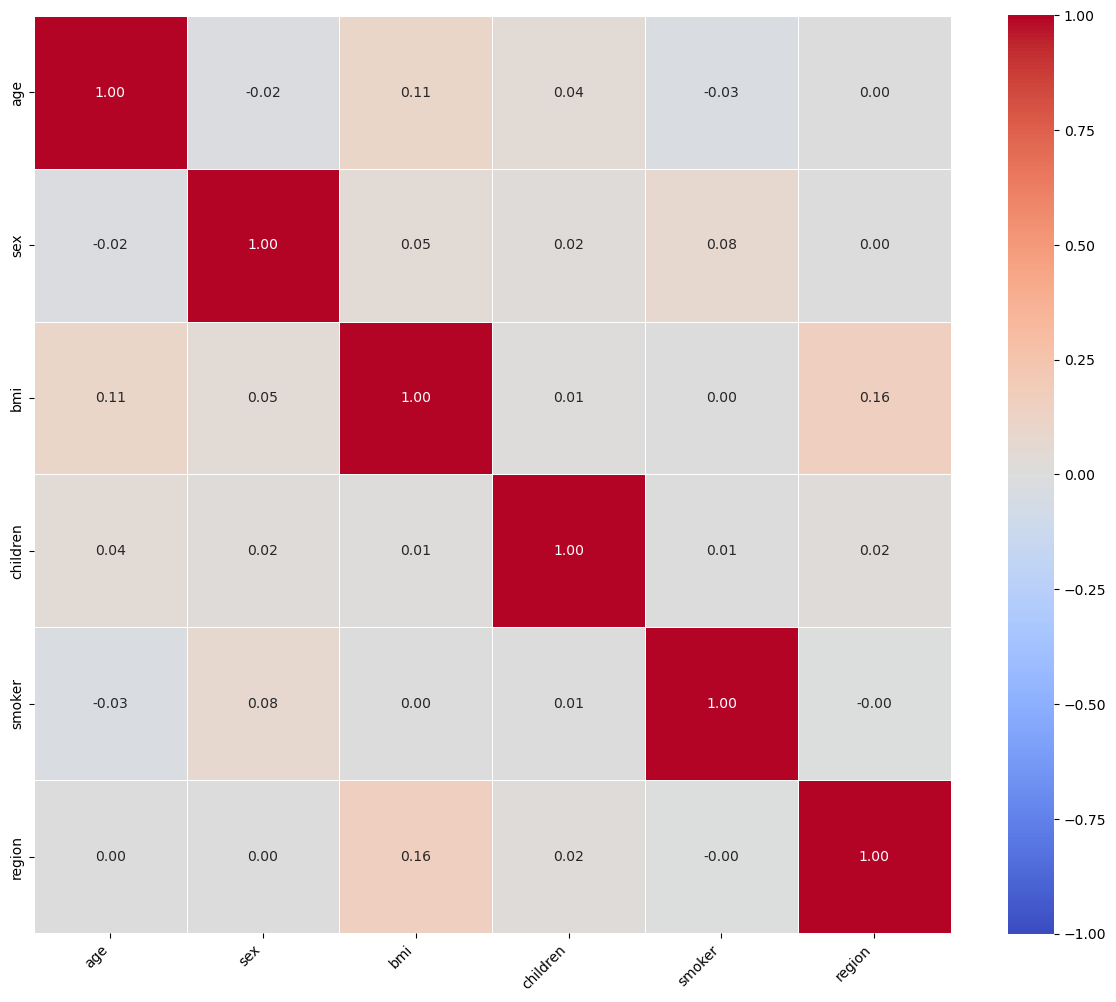

In [16]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    X.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout();

Визуализируем взаимосвязь между target-переменной и каждым из признаков

D:\PyThOn\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vgik\AppData\Local\Temp\ipykernel_21252\704377952.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


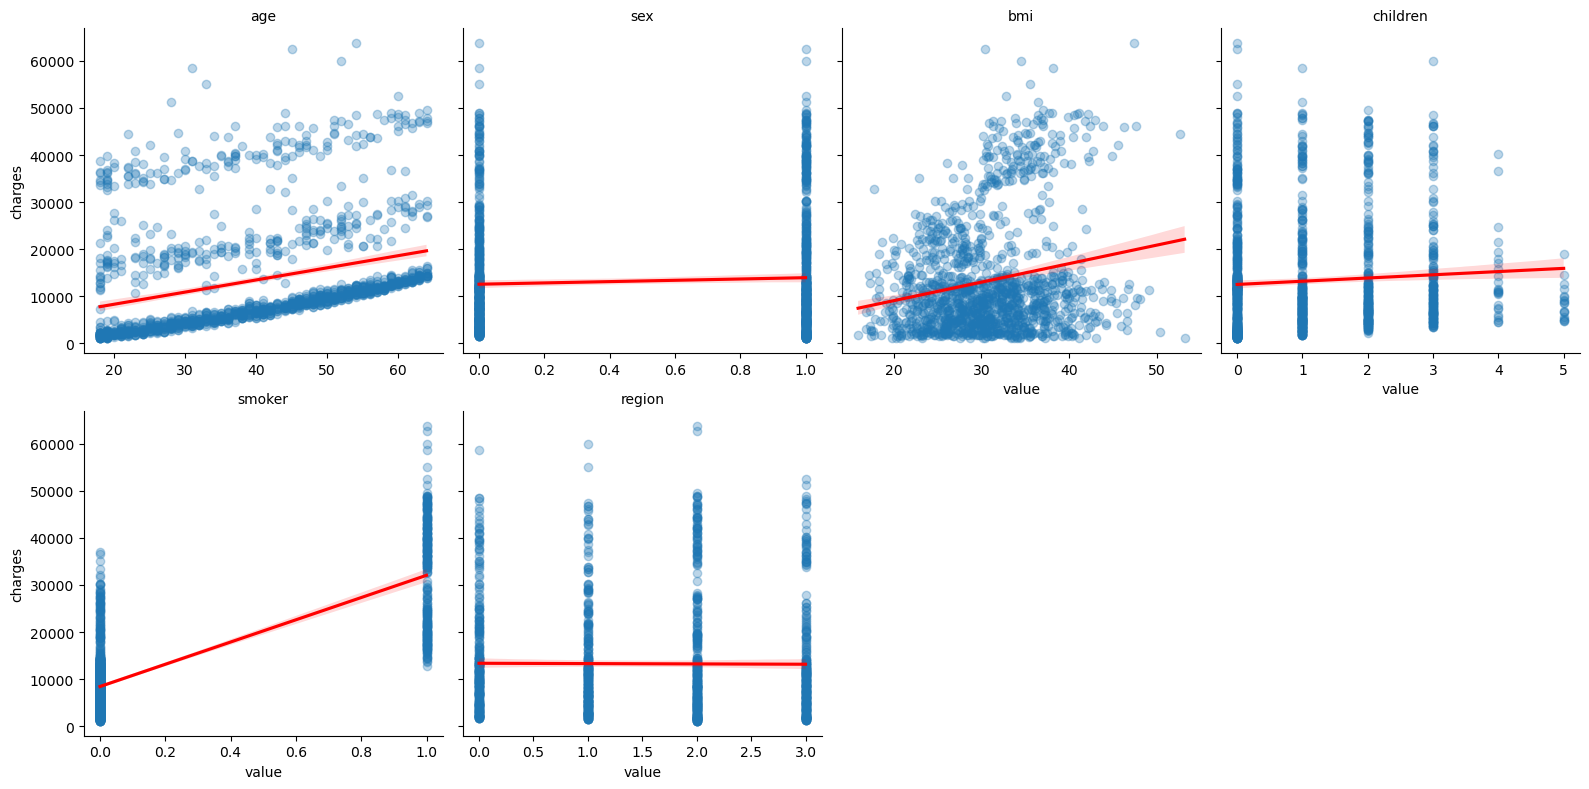

In [19]:
plot = sns.FacetGrid(
    data=df.melt(id_vars='charges'),
    col='variable',
    col_wrap=4,
    sharex=False,
    sharey=True,
    height=4
)

plot.map(
    sns.regplot,
    'value',
    'charges',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)


plot.set_titles("{col_name}")
plt.tight_layout();

Разделим данные на тестовые и тренировочные

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

Создадим и обучим модель линейной регрессии

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Оценим качество модели

In [24]:
preds = model.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f'MSE: {mse:.4f}\n'
      f'MAE: {mae:.4f}\n'
      f'R²: {r2:.4f}')

MSE: 31845929.1342
MAE: 3930.3333
R²: 0.7999


Выведем model.coef_ и model.intercept_.

In [25]:
print("Коэффициенты модели (coef_):")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")


print(f"\nСвободный член (intercept_): {model.intercept_:.4f}")

Коэффициенты модели (coef_):
age: 3567.2417
sex: -12.1616
bmi: 2001.9120
children: 534.7125
smoker: 9511.0599
region: -318.6496

Свободный член (intercept_): 13228.9994


Построим график с важностью коэфициентов при соответствующих признаках

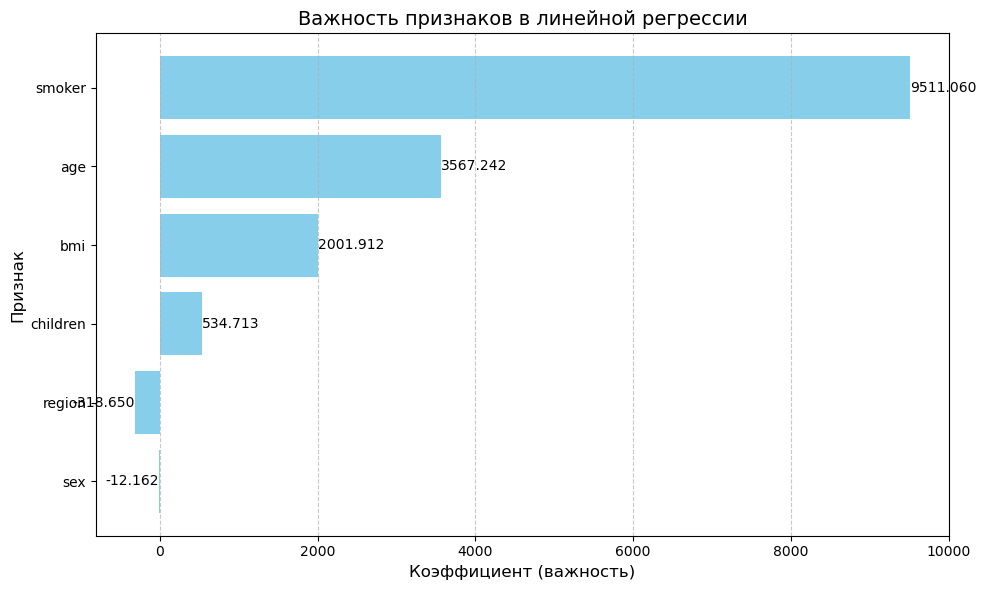

In [26]:
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': model.coef_,
    'abs_coef': np.abs(model.coef_)
})

coef_df = coef_df.sort_values(by='abs_coef', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['feature'], coef_df['coef'], color='skyblue')
plt.xlabel('Коэффициент (важность)', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в линейной регрессии', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(coef_df['coef']):
    plt.text(v, i, f"{v:.3f}", ha='left' if v > 0 else 'right', va='center', color='black')

plt.tight_layout();

С помощью GridSearchCV осуществим подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)

In [27]:
ridge_params = {'alpha': np.logspace(-3, 3, 50)}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

lasso_params = {'alpha': np.logspace(-3, 1, 50)}

lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

elastic_params = {
    'alpha': np.logspace(-3, 1, 20),
    'l1_ratio': np.linspace(0.1, 0.9, 10)
}

elastic = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])},
             scoring='neg_mean_squared_error')

Выведем значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе для наилучшей модели

In [43]:
best_ridge = ridge_grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression\n\n"
      f"Лучший alpha: {ridge_grid.best_params_['alpha']:.4f}"
      f"\nКоэффициенты модели:")
for feature, coef in zip(feature_names, best_ridge.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nСвободный член (intercept_): {best_ridge.intercept_:.4f}\n"
      f"\nМетрики на тестовом наборе:"
      f"\nMSE: {ridge_mse:.4f}"
      f"\nMAE: {ridge_mae:.4f}"
      f"\nR²: {ridge_r2:.4f}")

print(best_ridge.score(X_test, y_test))

Ridge Regression

Лучший alpha: 1.1514
Коэффициенты модели:
age: 3563.1288
sex: -11.6189
bmi: 2000.0151
children: 534.6546
smoker: 9500.5645
region: -318.3783

Свободный член (intercept_): 13228.9869

Метрики на тестовом наборе:
MSE: 31859036.2871
MAE: 3932.4539
R²: 0.7998
0.7997923469460834


In [44]:
best_lasso = lasso_grid.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression\n\n"
      f"Лучший alpha: {lasso_grid.best_params_['alpha']:.4f}"
      f"\nКоэффициенты модели:")
for feature, coef in zip(feature_names, best_lasso.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nСвободный член (intercept_): {best_lasso.intercept_:.4f}\n"
      f"\nМетрики на тестовом наборе:"
      f"\nMSE: {lasso_mse:.4f}"
      f"\nMAE: {lasso_mae:.4f}"
      f"\nR²: {lasso_r2:.4f}")

print(best_lasso.score(X_test, y_test))

Lasso Regression

Лучший alpha: 10.0000
Коэффициенты модели:
age: 3559.0064
sex: -1.1538
bmi: 1991.0350
children: 524.8797
smoker: 9500.3964
region: -307.0814

Свободный член (intercept_): 13228.8138

Метрики на тестовом наборе:
MSE: 31879904.8804
MAE: 3931.7941
R²: 0.7997
0.7996612051233489


In [45]:
best_elastic = elastic_grid.best_estimator_

y_pred_elastic = best_elastic.predict(X_test)
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_mae = mean_absolute_error(y_test, y_pred_elastic)
elastic_r2 = r2_score(y_test, y_pred_elastic)

print(f"Elastic Net Regression\n\n"
      f"Лучшие параметры: alpha={elastic_grid.best_params_['alpha']:.4f}, l1_ratio={elastic_grid.best_params_['l1_ratio']:.4f}"
      f"\nКоэффициенты модели:")
for feature, coef in zip(feature_names, best_elastic.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nСвободный член (intercept_): {best_elastic.intercept_:.4f}\n"
      f"\nМетрики на тестовом наборе:"
      f"\nMSE: {elastic_mse:.4f}"
      f"\nMAE: {elastic_mae:.4f}"
      f"\nR²: {elastic_r2:.4f}")

print(best_elastic.score(X_test, y_test))

Elastic Net Regression

Лучшие параметры: alpha=0.0113, l1_ratio=0.9000
Коэффициенты модели:
age: 3562.9192
sex: -11.5811
bmi: 1999.9111
children: 534.6417
smoker: 9500.0396
region: -318.3533

Свободный член (intercept_): 13228.9861

Метрики на тестовом наборе:
MSE: 31859719.6477
MAE: 3932.5592
R²: 0.7998
0.7997880525908169


Построим график с важностью коэфициентов при соответствующих признаках

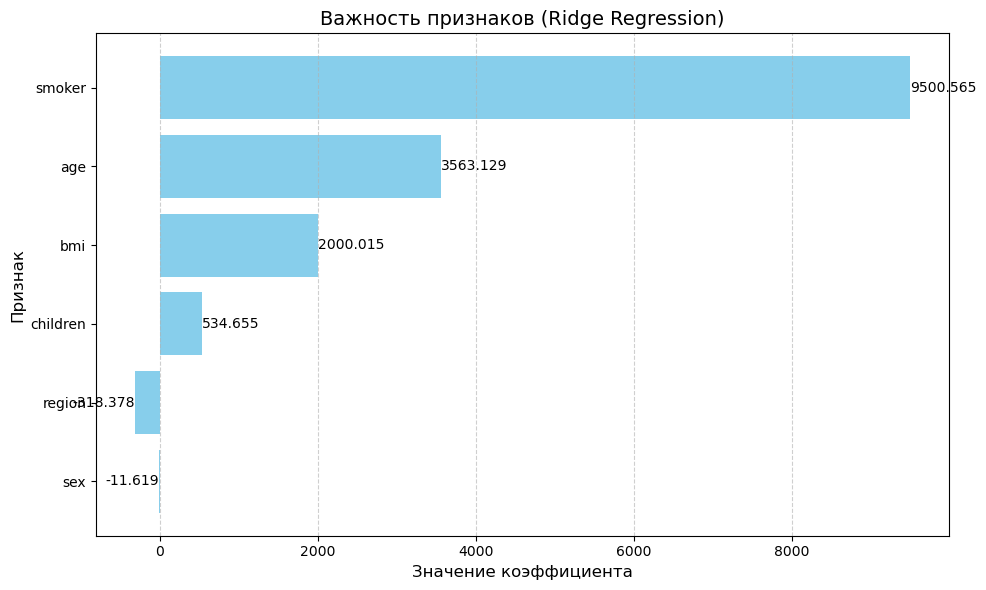

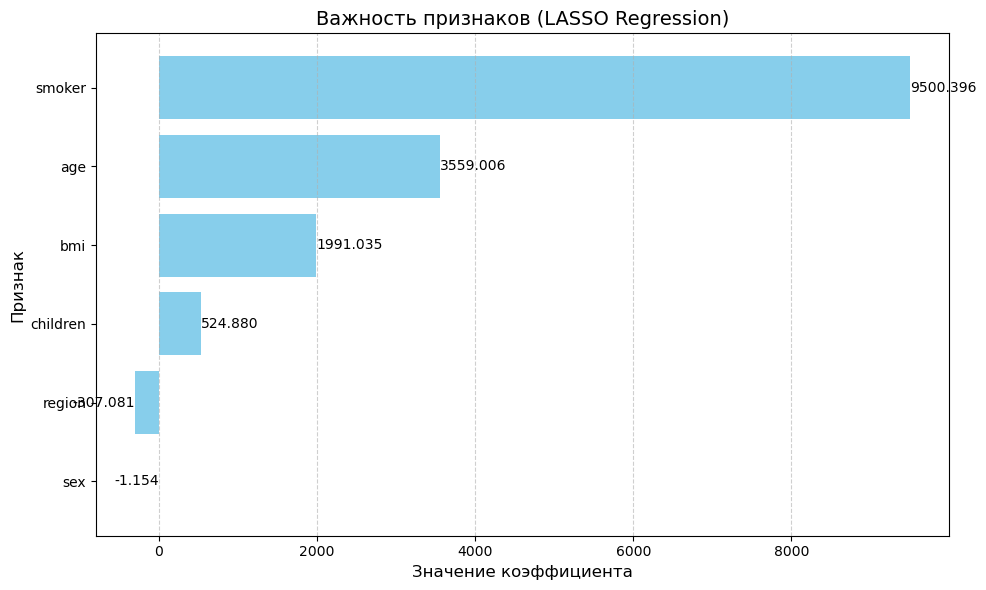

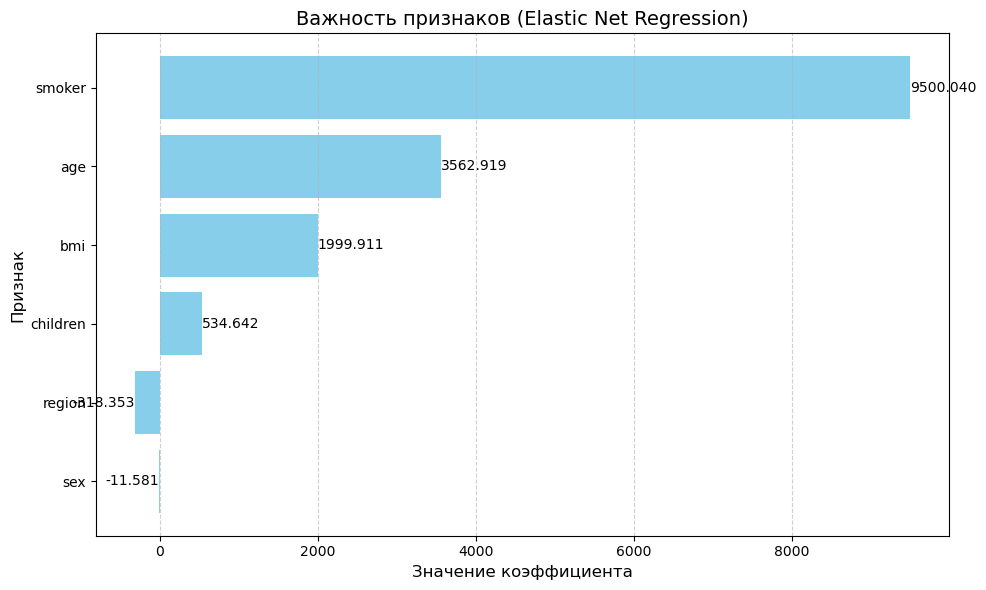

In [36]:
def plot_coefficients(coef, features, title):
    coef_df = pd.DataFrame({'feature': features, 'coef': coef}) # Создаем DataFrame с коэффициентами и признаками

    coef_df['abs_coef'] = np.abs(coef_df['coef'])
    coef_df = coef_df.sort_values('abs_coef', ascending=True) # Сортируем по абсолютным значениям коэффициентов

    # Строим график
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['feature'], coef_df['coef'], color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel('Значение коэффициента', fontsize=12)
    plt.ylabel('Признак', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Добавляем подписи значений
    for i, v in enumerate(coef_df['coef']):
        plt.text(v if v > 0 else v - 0.02, i, f"{v:.3f}",
                 ha='right' if v < 0 else 'left',
                 va='center',
                 color='black',
                 fontsize=10)
    plt.tight_layout()
    plt.show()


plot_coefficients(best_ridge.coef_, feature_names, 'Важность признаков (Ridge Regression)')
plot_coefficients(best_lasso.coef_, feature_names, 'Важность признаков (LASSO Regression)')
plot_coefficients(best_elastic.coef_, feature_names, 'Важность признаков (Elastic Net Regression)')

Осуществим фильтрацию признаков с использованием Recursive Feature Elimination

In [38]:
model = Ridge()

rfe = RFE(estimator=model, step=1)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print(f"Отобранные признаки: {selected_features.tolist()}\n")

ranking = pd.DataFrame({
    'Признак': X.columns,
    'Ранг': rfe.ranking_,
    'Выбран': rfe.support_
}).sort_values('Ранг')

print(f"\nРанжирование признаков:\n")
print(ranking)

Отобранные признаки: ['age', 'bmi', 'smoker']


Ранжирование признаков:

    Признак  Ранг  Выбран
0       age     1    True
2       bmi     1    True
4    smoker     1    True
3  children     2   False
5    region     3   False
1       sex     4   False


Построим график с важностью коэфициентов при соответствующих признаках

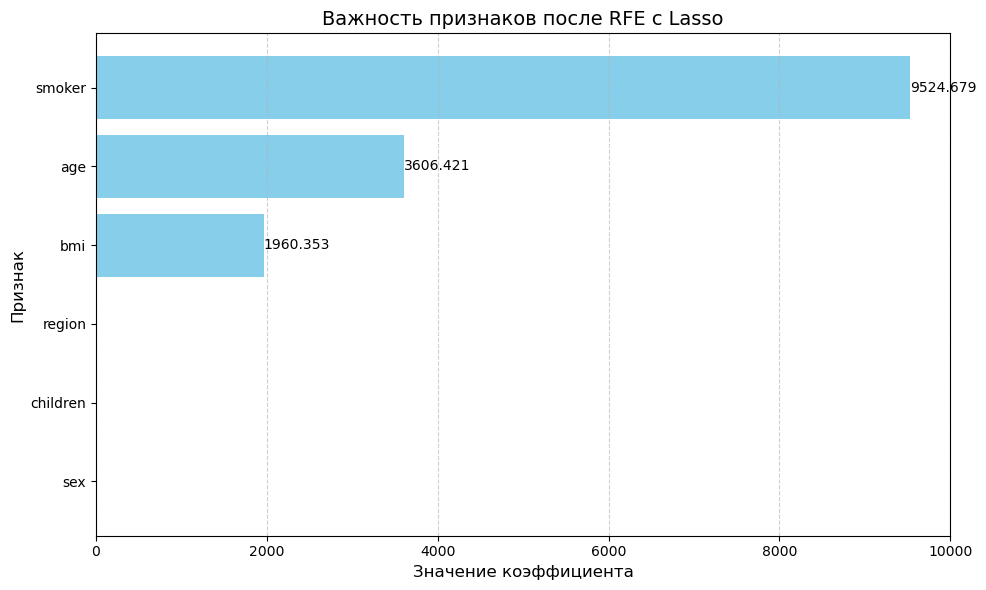

In [39]:
selected_coef = rfe.estimator_.coef_

full_coef = np.zeros(len(X.columns))
full_coef[rfe.support_] = selected_coef

sorted_idx = np.argsort(np.abs(full_coef))[::-1]
sorted_features = X.columns[sorted_idx]
sorted_coef = full_coef[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coef, color='skyblue')
plt.xlabel('Значение коэффициента', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков после RFE с Lasso', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (feat, coef) in enumerate(zip(sorted_features, sorted_coef)):
    if coef != 0:
        plt.text(coef if coef > 0 else coef - 0.02,
                 i,
                 f"{coef:.3f}",
                 ha='right' if coef < 0 else 'left',
                 va='center',
                 color='black')

plt.gca().invert_yaxis()
plt.tight_layout();

Выведем значения метрик на тестовом наборе данных

In [40]:
X_test_selected = rfe.transform(X_test)
y_pred = rfe.estimator_.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Метрики модели на тестовом наборе:\n"
      f"MSE: {mse:.4f}\n"
      f"MAE: {mae:.4f}\n"
      f"R²: {r2:.4f}\n"
      f"Количество отобранных признаков: {sum(rfe.support_)} из {len(X.columns)}")

Метрики модели на тестовом наборе:
MSE: 32701934.1056
MAE: 3962.5410
R²: 0.7945
Количество отобранных признаков: 3 из 6


Лучше всего справилась модель Ridge, по совокупности метрик она оказалась чуть лучше чем остальные

В результате использования Recursive Feature Elimination метрики ухудшились